In [1]:
import gym
import torch
import pickle

import numpy as np
from env import get_env

/opt/conda/envs/revive/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

policy_path = "./logs/revive/policy.pkl"
policy = pickle.load(open(policy_path, 'rb'), encoding='utf-8')

In [ ]:


rewards_list = []

dataset = {
    "obs" : [],
    "next_obs" : [],
    "target" : [],
    "action" : [],
    "index" : [],
    "loss" : [],
}

for trj_id in range(100):
    env = get_env()
    obs,_ = env.reset(seed=trj_id+1000)
    
    rewards = []
    for i in range(1000):
        if env.include_action:
            action_list = obs[:22]
            obs_list = obs[22:]
            action = env.action_space.sample()
            #print(obs_list[2]/(obs_list[1] - action_list[1]))
            #action = np.clip((obs_list[-1:] - obs_list[0:1])*0.1,-1,1)
            action = np.clip((obs[-1:] - obs[-2:-1])*0.07,-1,1)
            
        else:
            action = policy.infer({"obs":np.array(obs)[[0, 1]].reshape(1,-1), "target":np.array(obs)[[-1,]].reshape(1,-1)}).reshape(-1)
            #action = np.clip((obs[-1:] - obs[-2:-1])*0.07,-1,1)

        dataset["loss"].append(np.array(env.tributary_rate).reshape(1,-1))
        dataset["obs"].append(np.array(obs)[[0, 1]].reshape(1,-1))
        #dataset["obs"].append(np.array(obs).reshape(1,-1))
        dataset["target"].append(np.array(obs)[[-1,]].reshape(1,-1))
        dataset["action"].append(np.array(action).reshape(1,-1))
        obs, reward, done, _, info, = env.step(action)
        dataset["next_obs"].append(np.array(obs)[[0, 1]].reshape(1,-1))
        
        
        rewards.append(reward)

    dataset["index"].append(len(dataset["obs"]))
    rewards_list.append(np.sum(rewards))
    
for k,v in dataset.items():
    if k != "index":
        dataset[k] = np.concatenate(v) 
    else:
        dataset[k] = np.array(v)
print(np.mean(rewards_list), np.std(rewards_list))

3692.1691710695213 180.63011717602816


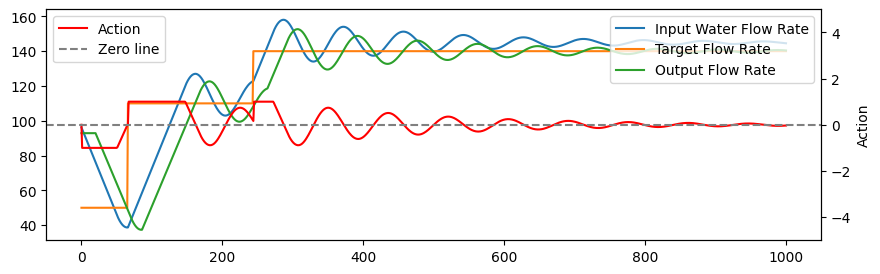

In [7]:
env.render()